In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer 
import operator
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


documents=pd.read_excel('직업text.xlsx')
doc_text=documents['text']
tagged_text_both = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(doc_text)]


max_epochs = 100
vec_size = 12
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=10,
                dm =1)
  
model.build_vocab(tagged_text_both)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_text_both,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")







model= Doc2Vec.load("d2v.model")

vector_arr=[]
for i in range(len(doc_text)):
    data = word_tokenize(doc_text[i].lower())
    v=model.infer_vector(data)
    vector_arr.append(v)
    
    
    
text_standard = StandardScaler().fit_transform(vector_arr)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(text_standard)
#principalComponents = StandardScaler().fit_transform(principalComponents)




df = pd.DataFrame(data = principalComponents, columns = ['principal_component_1', 'principal_component_2'],index=documents['직업'])
add = documents['분야'].values
df['분야'] = add





C:\Users\jihun\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
C:\Users\jihun\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

C:\Users\jihun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jihun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


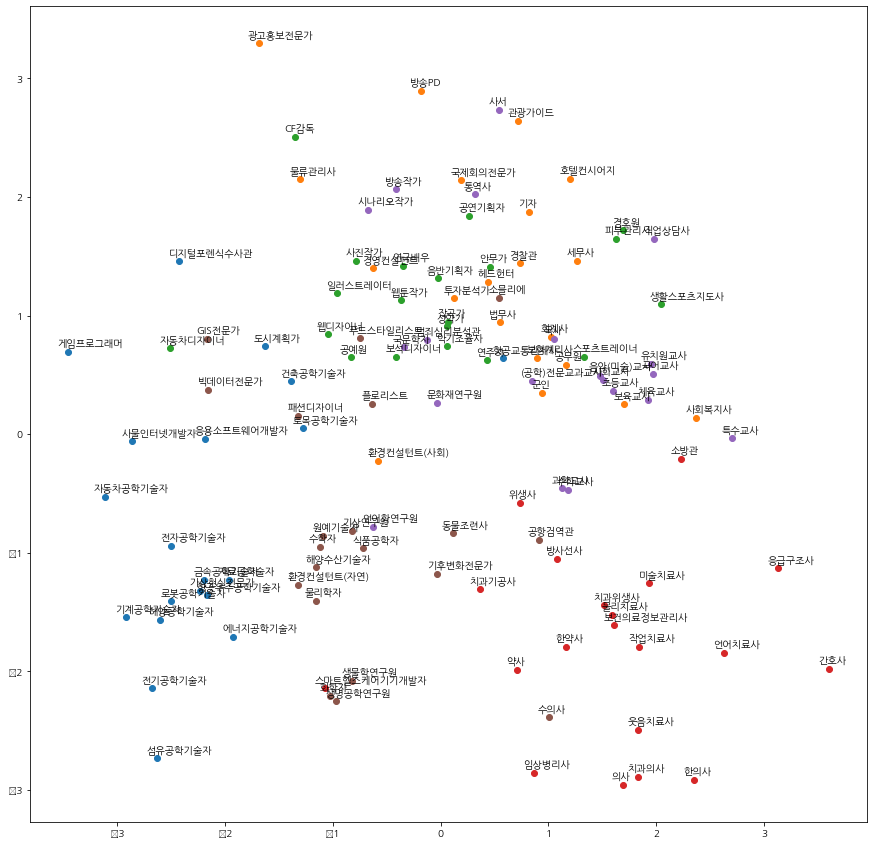

In [21]:


plt.rcParams['figure.figsize'] = [15, 15]
groups = df.groupby('분야')   
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.principal_component_1, 
            group.principal_component_2, 
            marker='o', 
            linestyle='',
            label=name)
plt.rcParams['font.family'] = 'NanumGothic'
for i in range(len(df)):
    ax.text(float(df['principal_component_1'][i]) -0.1, float(df['principal_component_2'][i]) + 0.05, df.index[i])
